# Real Hardware Fitting

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Two Qubit POVM

In [27]:
n = 2
d = 2**n

input_map_list, counts_map_list, counts_rep_list, counts_corr_list = pickle.load(open("../../data/twoQubits_pauliStrings_corrMat.p", "rb"))

targets_map = counts_to_probs(counts_map_list)
corr_matrix = sum([generate_corruption_matrix(counts_corr_list[i*d: (i+1)*d]) for i in range(d)])/d

In [28]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spam_model = SPAM(
                  d=d,
                  init = init_ideal(n),
                  povm = corr_mat_to_povm(corr_matrix),
                  )

In [29]:
rank = d**2

circuit_target = variational_circuit(n).reverse_bits()
U = Operator(circuit_target).data

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

kraus_model = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       spam = spam_model,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [30]:
#model.train(inputs = [input_map_list[0][:300], input_map_list[1][:300]],
#            targets = targets_map[:300],
#            inputs_val = [input_map_list[0][300:], input_map_list[1][300:]],
#            targets_val = targets_map[300:],
#            num_iter = 1000,
#            N = 300
#            )

model.train(inputs = input_map_list,
            targets = targets_map,
            inputs_val = input_map_list,
            targets_val = targets_map,
            num_iter = 1000,
            N = 324
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 0.50742, val: 0.50742
Step:1, train: 0.50205, val: 0.50205
Step:2, train: 0.49667, val: 0.49667
Step:3, train: 0.49130, val: 0.49130
Step:4, train: 0.48592, val: 0.48592
Step:5, train: 0.48054, val: 0.48054
Step:6, train: 0.47517, val: 0.47517
Step:7, train: 0.46980, val: 0.46980
Step:8, train: 0.46443, val: 0.46443
Step:9, train: 0.45906, val: 0.45906
Step:10, train: 0.45371, val: 0.45371
Step:11, train: 0.44836, val: 0.44836
Step:12, train: 0.44301, val: 0.44301
Step:13, train: 0.43767, val: 0.43767
Step:14, train: 0.43232, val: 0.43232
Step:15, train: 0.42695, val: 0.42695
Step:16, train: 0.42154, val: 0.42154
Step:17, train: 0.41612, val: 0.41612
Step:18, train: 0.41068, val: 0.41068
Step:19, train: 0.40524, val: 0.40524
Step:20, train: 0.39979, val: 0.39979
Step:21, train: 0.39432, val: 0.39432
Step:22, train: 0.38883, val: 0.38883
Step:23, train: 0.38332, val: 0.38332
Step:24, train: 0.37777, val: 0.37777
Step:25, train: 0.37220, val: 0.37220
Step:26, train: 0.3666

Step:216, train: 0.00603, val: 0.00603
Step:217, train: 0.00596, val: 0.00596
Step:218, train: 0.00590, val: 0.00590
Step:219, train: 0.00584, val: 0.00584
Step:220, train: 0.00577, val: 0.00577
Step:221, train: 0.00571, val: 0.00571
Step:222, train: 0.00565, val: 0.00565
Step:223, train: 0.00560, val: 0.00560
Step:224, train: 0.00554, val: 0.00554
Step:225, train: 0.00548, val: 0.00548
Step:226, train: 0.00543, val: 0.00543
Step:227, train: 0.00537, val: 0.00537
Step:228, train: 0.00532, val: 0.00532
Step:229, train: 0.00527, val: 0.00527
Step:230, train: 0.00522, val: 0.00522
Step:231, train: 0.00517, val: 0.00517
Step:232, train: 0.00512, val: 0.00512
Step:233, train: 0.00507, val: 0.00507
Step:234, train: 0.00502, val: 0.00502
Step:235, train: 0.00498, val: 0.00498
Step:236, train: 0.00493, val: 0.00493
Step:237, train: 0.00489, val: 0.00489
Step:238, train: 0.00484, val: 0.00484
Step:239, train: 0.00480, val: 0.00480
Step:240, train: 0.00476, val: 0.00476
Step:241, train: 0.00472,

Step:428, train: 0.00213, val: 0.00213
Step:429, train: 0.00213, val: 0.00213
Step:430, train: 0.00212, val: 0.00212
Step:431, train: 0.00212, val: 0.00212
Step:432, train: 0.00212, val: 0.00212
Step:433, train: 0.00211, val: 0.00211
Step:434, train: 0.00211, val: 0.00211
Step:435, train: 0.00211, val: 0.00211
Step:436, train: 0.00210, val: 0.00210
Step:437, train: 0.00210, val: 0.00210
Step:438, train: 0.00210, val: 0.00210
Step:439, train: 0.00209, val: 0.00209
Step:440, train: 0.00209, val: 0.00209
Step:441, train: 0.00208, val: 0.00208
Step:442, train: 0.00208, val: 0.00208
Step:443, train: 0.00208, val: 0.00208
Step:444, train: 0.00208, val: 0.00208
Step:445, train: 0.00207, val: 0.00207
Step:446, train: 0.00207, val: 0.00207
Step:447, train: 0.00207, val: 0.00207
Step:448, train: 0.00206, val: 0.00206
Step:449, train: 0.00206, val: 0.00206
Step:450, train: 0.00206, val: 0.00206
Step:451, train: 0.00205, val: 0.00205
Step:452, train: 0.00205, val: 0.00205
Step:453, train: 0.00205,

Step:642, train: 0.00175, val: 0.00175
Step:643, train: 0.00175, val: 0.00175
Step:644, train: 0.00175, val: 0.00175
Step:645, train: 0.00175, val: 0.00175
Step:646, train: 0.00175, val: 0.00175
Step:647, train: 0.00175, val: 0.00175
Step:648, train: 0.00174, val: 0.00174
Step:649, train: 0.00174, val: 0.00174
Step:650, train: 0.00174, val: 0.00174
Step:651, train: 0.00174, val: 0.00174
Step:652, train: 0.00174, val: 0.00174
Step:653, train: 0.00174, val: 0.00174
Step:654, train: 0.00174, val: 0.00174
Step:655, train: 0.00174, val: 0.00174
Step:656, train: 0.00174, val: 0.00174
Step:657, train: 0.00174, val: 0.00174
Step:658, train: 0.00174, val: 0.00174
Step:659, train: 0.00174, val: 0.00174
Step:660, train: 0.00174, val: 0.00174
Step:661, train: 0.00173, val: 0.00173
Step:662, train: 0.00173, val: 0.00173
Step:663, train: 0.00173, val: 0.00173
Step:664, train: 0.00173, val: 0.00173
Step:665, train: 0.00173, val: 0.00173
Step:666, train: 0.00173, val: 0.00173
Step:667, train: 0.00173,

Step:854, train: 0.00165, val: 0.00165
Step:855, train: 0.00164, val: 0.00164
Step:856, train: 0.00164, val: 0.00164
Step:857, train: 0.00164, val: 0.00164
Step:858, train: 0.00164, val: 0.00164
Step:859, train: 0.00164, val: 0.00164
Step:860, train: 0.00164, val: 0.00164
Step:861, train: 0.00164, val: 0.00164
Step:862, train: 0.00164, val: 0.00164
Step:863, train: 0.00164, val: 0.00164
Step:864, train: 0.00164, val: 0.00164
Step:865, train: 0.00164, val: 0.00164
Step:866, train: 0.00164, val: 0.00164
Step:867, train: 0.00164, val: 0.00164
Step:868, train: 0.00164, val: 0.00164
Step:869, train: 0.00164, val: 0.00164
Step:870, train: 0.00164, val: 0.00164
Step:871, train: 0.00164, val: 0.00164
Step:872, train: 0.00164, val: 0.00164
Step:873, train: 0.00164, val: 0.00164
Step:874, train: 0.00164, val: 0.00164
Step:875, train: 0.00164, val: 0.00164
Step:876, train: 0.00164, val: 0.00164
Step:877, train: 0.00164, val: 0.00164
Step:878, train: 0.00164, val: 0.00164
Step:879, train: 0.00164,

In [31]:
state_unitary = state_model = tf.expand_dims(model.q_map.spam.init, axis=0)

observ = np.zeros((1, d))
observ[0, 0] = 1
observ = tf.cast(observ, dtype=tf.complex128)
model_expectation_list = []
unitary_expectation_list = []

probs = counts_to_probs(counts_rep_list)
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.spam.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(measurement(state_unitary, povm=model.q_map.spam.povm), observ))

      ┌────────────┐ ┌───┐┌─────────────┐     
q_0: ─┤ Ry(2.8319) ├─┤ X ├┤ Rx(0.61989) ├──■──
     ┌┴────────────┴┐└─┬─┘└┬────────────┤┌─┴─┐
q_1: ┤ Ry(-0.78829) ├──■───┤ Rx(1.4577) ├┤ X ├
     └──────────────┘      └────────────┘└───┘


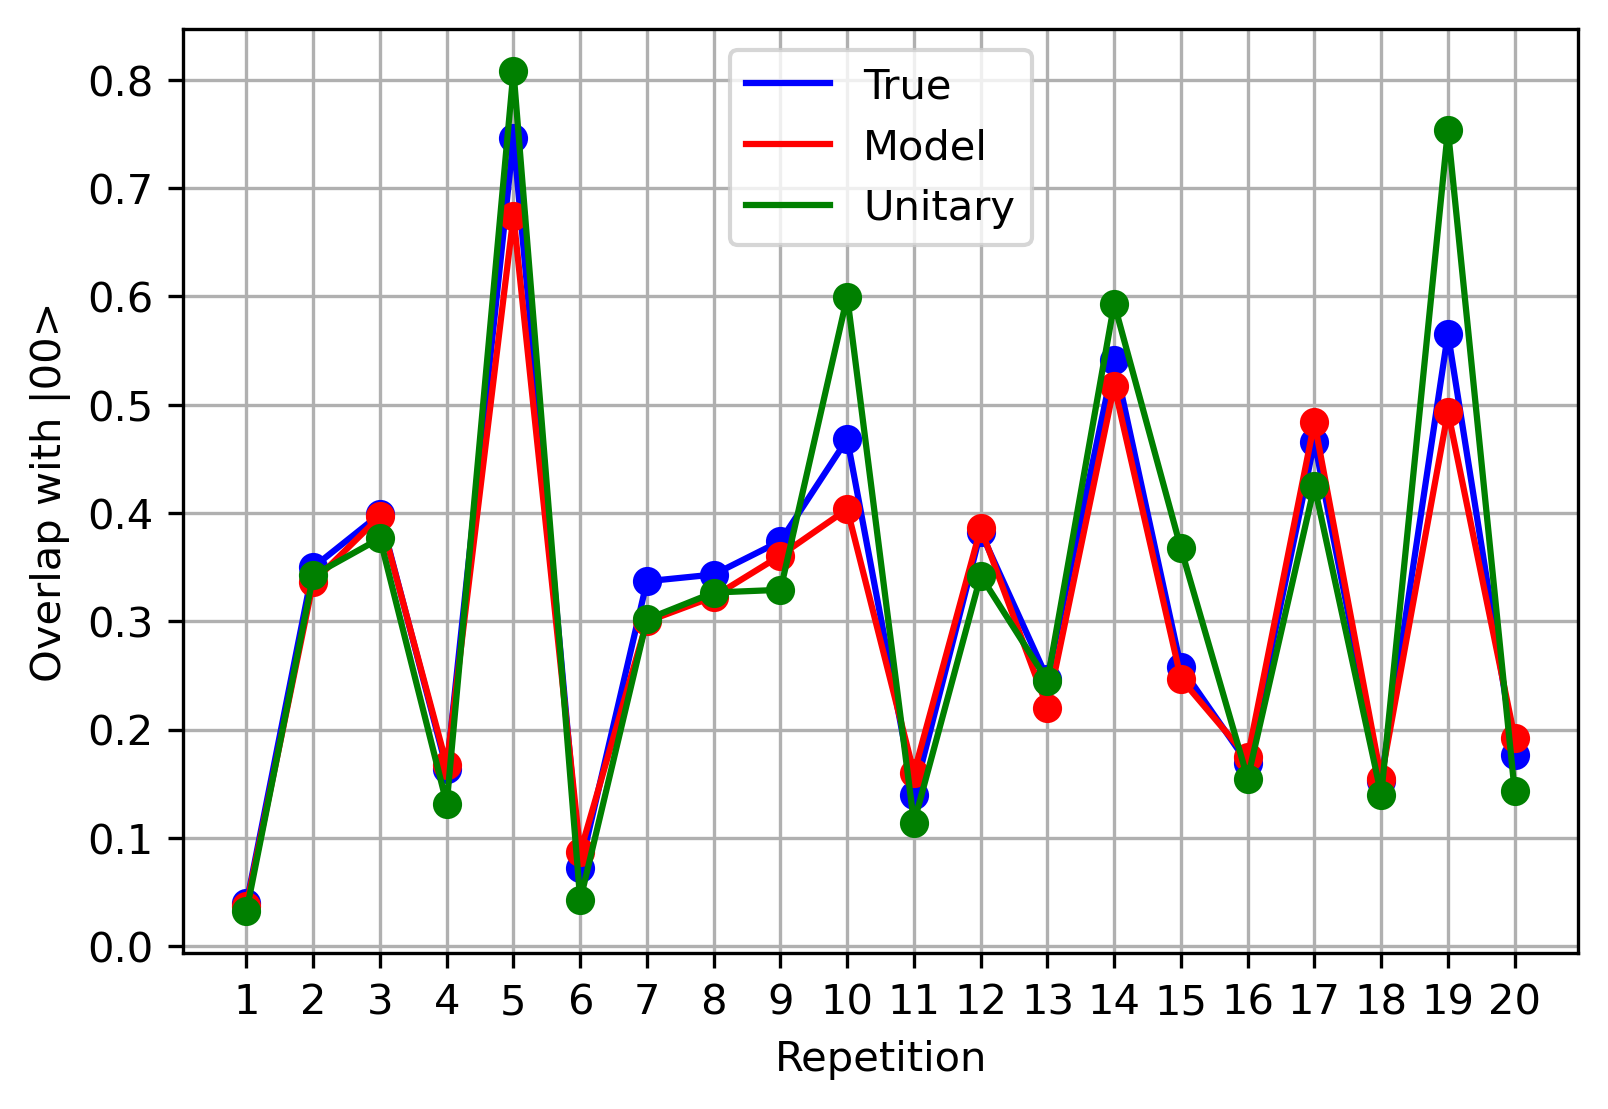

In [32]:
print(circuit_target)

fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |00>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

## Three Qubits 

In [33]:
n = 3
d = 2**n

input_map_list, counts_map_list, counts_rep_list, counts_corr_list = pickle.load(open("../../data/threeQubits_pauliStrings_corrMat_3.p", "rb"))

targets_map = counts_to_probs(counts_map_list)
corr_matrix = sum([generate_corruption_matrix(counts_corr_list[i*d: (i+1)*d]) for i in range(d)])/d

In [34]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spam_model = SPAM(
                  d=d,
                  init = init_ideal(n),
                  povm = corr_mat_to_povm(corr_matrix),
                  )

In [51]:
rank = 3

circuit_target = variational_circuit(n).reverse_bits()
U = Operator(circuit_target).data

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

kraus_model = KrausMap(
                       U = U,
                       c = 0.9,
                       d = d, 
                       rank = rank,
                       spam = spam_model,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [52]:
model.train(inputs = input_map_list,
            targets = targets_map,
            inputs_val = None,
            targets_val = None,
            num_iter = 1000,
            N = 500
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 0.02835, val: 0.00000
Step:1, train: 0.02706, val: 0.00000
Step:2, train: 0.02558, val: 0.00000
Step:3, train: 0.02632, val: 0.00000
Step:4, train: 0.02645, val: 0.00000
Step:5, train: 0.02667, val: 0.00000
Step:6, train: 0.02604, val: 0.00000
Step:7, train: 0.02687, val: 0.00000
Step:8, train: 0.02497, val: 0.00000
Step:9, train: 0.02612, val: 0.00000
Step:10, train: 0.02669, val: 0.00000
Step:11, train: 0.02475, val: 0.00000
Step:12, train: 0.02492, val: 0.00000
Step:13, train: 0.02505, val: 0.00000
Step:14, train: 0.02444, val: 0.00000
Step:15, train: 0.02527, val: 0.00000
Step:16, train: 0.02445, val: 0.00000
Step:17, train: 0.02445, val: 0.00000
Step:18, train: 0.02401, val: 0.00000
Step:19, train: 0.02467, val: 0.00000
Step:20, train: 0.02511, val: 0.00000
Step:21, train: 0.02398, val: 0.00000
Step:22, train: 0.02358, val: 0.00000
Step:23, train: 0.02342, val: 0.00000
Step:24, train: 0.02236, val: 0.00000
Step:25, train: 0.02362, val: 0.00000
Step:26, train: 0.0238

Step:214, train: 0.01244, val: 0.00000
Step:215, train: 0.01290, val: 0.00000
Step:216, train: 0.01274, val: 0.00000
Step:217, train: 0.01235, val: 0.00000
Step:218, train: 0.01303, val: 0.00000
Step:219, train: 0.01225, val: 0.00000
Step:220, train: 0.01298, val: 0.00000
Step:221, train: 0.01272, val: 0.00000
Step:222, train: 0.01285, val: 0.00000
Step:223, train: 0.01249, val: 0.00000
Step:224, train: 0.01205, val: 0.00000
Step:225, train: 0.01271, val: 0.00000
Step:226, train: 0.01250, val: 0.00000
Step:227, train: 0.01223, val: 0.00000
Step:228, train: 0.01282, val: 0.00000
Step:229, train: 0.01155, val: 0.00000
Step:230, train: 0.01202, val: 0.00000
Step:231, train: 0.01243, val: 0.00000
Step:232, train: 0.01199, val: 0.00000
Step:233, train: 0.01192, val: 0.00000
Step:234, train: 0.01231, val: 0.00000
Step:235, train: 0.01194, val: 0.00000
Step:236, train: 0.01152, val: 0.00000
Step:237, train: 0.01207, val: 0.00000
Step:238, train: 0.01167, val: 0.00000
Step:239, train: 0.01173,

Step:426, train: 0.01108, val: 0.00000
Step:427, train: 0.01101, val: 0.00000
Step:428, train: 0.01086, val: 0.00000
Step:429, train: 0.01170, val: 0.00000
Step:430, train: 0.01102, val: 0.00000
Step:431, train: 0.01095, val: 0.00000
Step:432, train: 0.01115, val: 0.00000
Step:433, train: 0.01077, val: 0.00000
Step:434, train: 0.01071, val: 0.00000
Step:435, train: 0.01037, val: 0.00000
Step:436, train: 0.01139, val: 0.00000
Step:437, train: 0.01140, val: 0.00000
Step:438, train: 0.01046, val: 0.00000
Step:439, train: 0.01116, val: 0.00000
Step:440, train: 0.01056, val: 0.00000
Step:441, train: 0.01076, val: 0.00000
Step:442, train: 0.01096, val: 0.00000
Step:443, train: 0.01113, val: 0.00000
Step:444, train: 0.01079, val: 0.00000
Step:445, train: 0.01060, val: 0.00000
Step:446, train: 0.01081, val: 0.00000
Step:447, train: 0.01077, val: 0.00000
Step:448, train: 0.01065, val: 0.00000
Step:449, train: 0.01069, val: 0.00000
Step:450, train: 0.01100, val: 0.00000
Step:451, train: 0.01089,

Step:640, train: 0.01065, val: 0.00000
Step:641, train: 0.01166, val: 0.00000
Step:642, train: 0.01079, val: 0.00000
Step:643, train: 0.01090, val: 0.00000
Step:644, train: 0.01067, val: 0.00000
Step:645, train: 0.01078, val: 0.00000
Step:646, train: 0.01097, val: 0.00000
Step:647, train: 0.01059, val: 0.00000
Step:648, train: 0.01089, val: 0.00000
Step:649, train: 0.01079, val: 0.00000
Step:650, train: 0.01082, val: 0.00000
Step:651, train: 0.01068, val: 0.00000
Step:652, train: 0.01057, val: 0.00000
Step:653, train: 0.01090, val: 0.00000
Step:654, train: 0.01088, val: 0.00000
Step:655, train: 0.01099, val: 0.00000
Step:656, train: 0.01061, val: 0.00000
Step:657, train: 0.01090, val: 0.00000
Step:658, train: 0.01127, val: 0.00000
Step:659, train: 0.01101, val: 0.00000
Step:660, train: 0.01123, val: 0.00000
Step:661, train: 0.01105, val: 0.00000
Step:662, train: 0.01084, val: 0.00000
Step:663, train: 0.01087, val: 0.00000
Step:664, train: 0.01108, val: 0.00000
Step:665, train: 0.01057,

Step:853, train: 0.00978, val: 0.00000
Step:854, train: 0.01078, val: 0.00000
Step:855, train: 0.01034, val: 0.00000
Step:856, train: 0.01085, val: 0.00000
Step:857, train: 0.01039, val: 0.00000
Step:858, train: 0.01015, val: 0.00000
Step:859, train: 0.00991, val: 0.00000
Step:860, train: 0.01070, val: 0.00000
Step:861, train: 0.01054, val: 0.00000
Step:862, train: 0.01047, val: 0.00000
Step:863, train: 0.01023, val: 0.00000
Step:864, train: 0.01129, val: 0.00000
Step:865, train: 0.01028, val: 0.00000
Step:866, train: 0.01081, val: 0.00000
Step:867, train: 0.01053, val: 0.00000
Step:868, train: 0.01075, val: 0.00000
Step:869, train: 0.01069, val: 0.00000
Step:870, train: 0.01114, val: 0.00000
Step:871, train: 0.01039, val: 0.00000
Step:872, train: 0.01039, val: 0.00000
Step:873, train: 0.01098, val: 0.00000
Step:874, train: 0.01101, val: 0.00000
Step:875, train: 0.01075, val: 0.00000
Step:876, train: 0.01089, val: 0.00000
Step:877, train: 0.01068, val: 0.00000
Step:878, train: 0.01023,

In [53]:
state_unitary = state_model = tf.expand_dims(model.q_map.spam.init, axis=0)

observ = np.zeros((1, d))
observ[0, 0] = 1
observ = tf.cast(observ, dtype=tf.complex128)
model_expectation_list = []
unitary_expectation_list = []

probs = counts_to_probs(counts_rep_list)
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.spam.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(measurement(state_unitary, povm=model.q_map.spam.povm), observ))

      ┌────────────┐           ┌───┐     ┌─────────────┐          
q_0: ─┤ Ry(1.4577) ├───────────┤ X ├─────┤ Rx(-2.1615) ├──■───────
      ├────────────┤ ┌───┐     └─┬─┘     ├─────────────┤┌─┴─┐     
q_1: ─┤ Ry(2.8319) ├─┤ X ├───────■───────┤ Rx(-2.1613) ├┤ X ├──■──
     ┌┴────────────┴┐└─┬─┘┌─────────────┐└─────────────┘└───┘┌─┴─┐
q_2: ┤ Ry(-0.78829) ├──■──┤ Rx(0.61989) ├────────────────────┤ X ├
     └──────────────┘     └─────────────┘                    └───┘


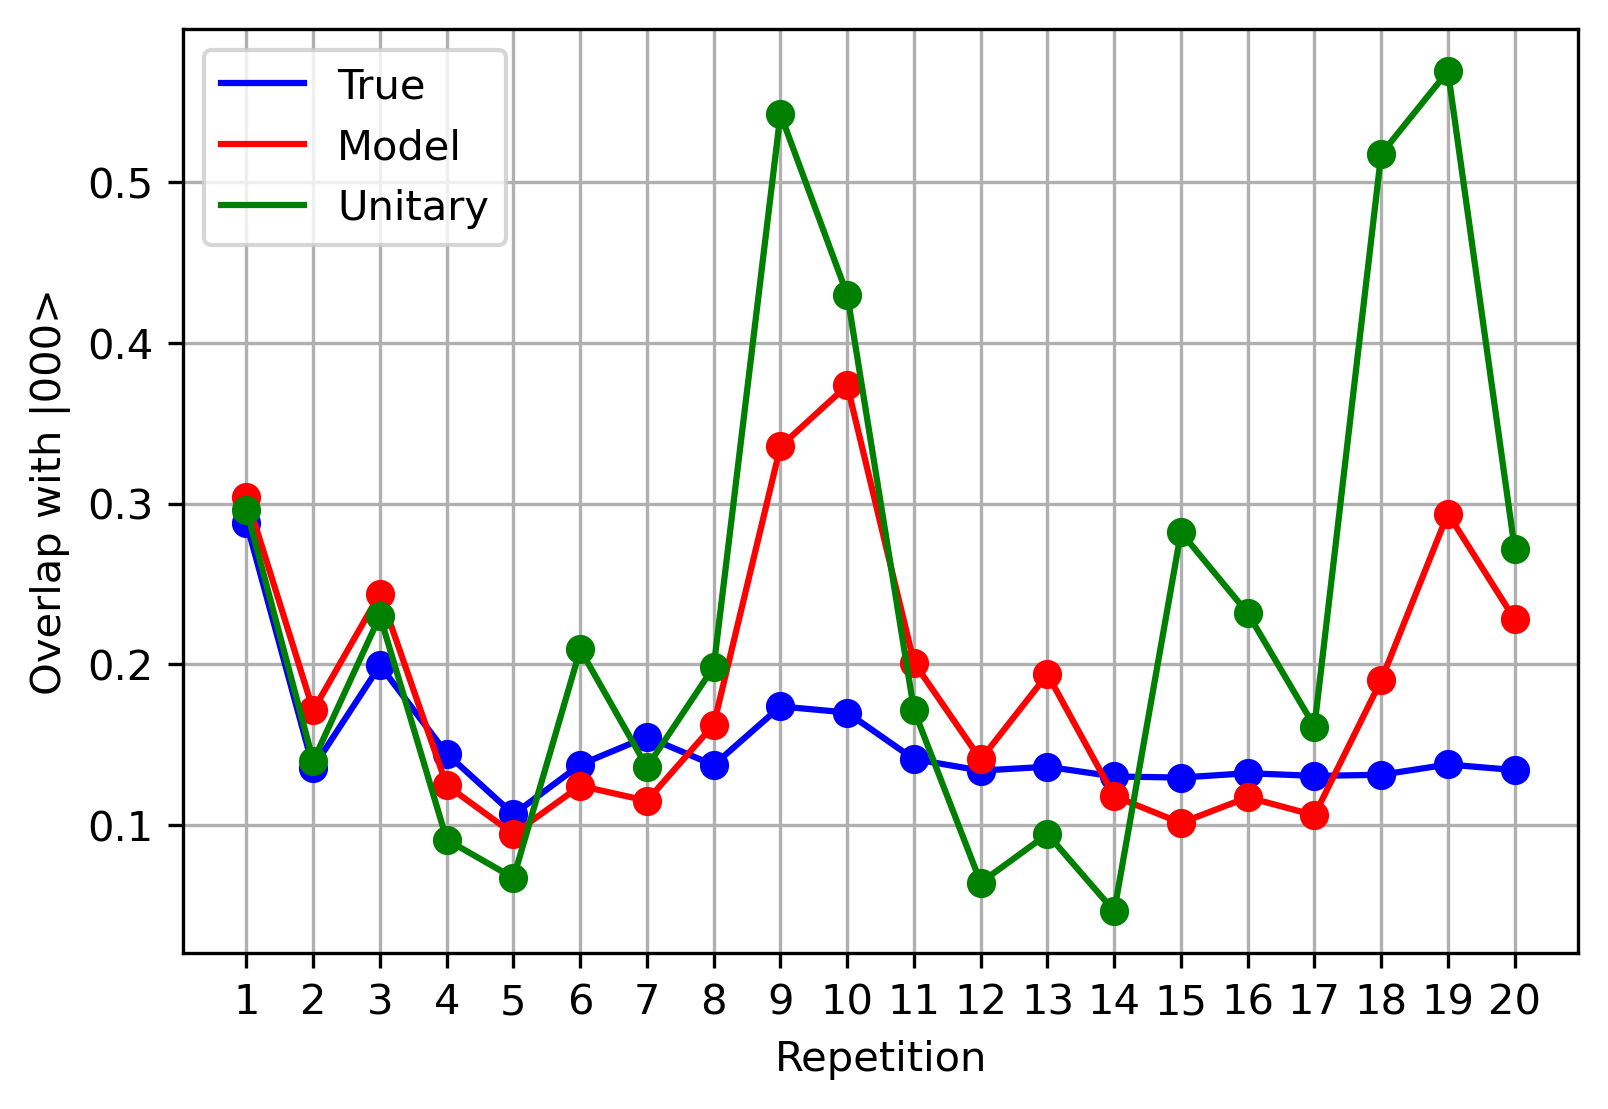

In [54]:
print(circuit_target)

fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |000>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()